In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
player = 'Jasprit Bumrah'
url = "http://search.espncricinfo.com/ci/content/player/search.html?search=" + player.lower().replace(" ","+") + "&x=0&y=0"
page = requests.get(url)

In [3]:
soup = BeautifulSoup(page.content, "html.parser")
player_id = str(soup.find_all(class_='ColumnistSmry')[0]).split('.html')[0].split('/')[-1]
df =pd.read_html(f"https://stats.espncricinfo.com/stats/engine/player/{player_id}.html?class=11;template=results;type=bowling;view=innings")[3]

In [4]:
df.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Unnamed: 11
0,10.0,0,40,2,4.00,3,1,NaN,ODI v Australia,Sydney,23 Jan 2016,ODI # 3727
1,3.3,0,23,3,6.57,3,2,NaN,T20I v Australia,Adelaide,26 Jan 2016,T20I # 485
2,4.0,0,37,2,9.25,2,2,NaN,T20I v Australia,Melbourne,29 Jan 2016,T20I # 486
3,4.0,0,43,1,10.75,2,1,NaN,T20I v Australia,Sydney,31 Jan 2016,T20I # 489
4,4.0,1,19,0,4.75,2,2,NaN,T20I v Sri Lanka,Pune,9 Feb 2016,T20I # 496


In [5]:
del df['Unnamed: 11']

In [6]:
df

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date
0,10.0,0,40,2,4.00,3,1,NaN,ODI v Australia,Sydney,23 Jan 2016
1,3.3,0,23,3,6.57,3,2,NaN,T20I v Australia,Adelaide,26 Jan 2016
2,4.0,0,37,2,9.25,2,2,NaN,T20I v Australia,Melbourne,29 Jan 2016
3,4.0,0,43,1,10.75,2,1,NaN,T20I v Australia,Sydney,31 Jan 2016
4,4.0,1,19,0,4.75,2,2,NaN,T20I v Sri Lanka,Pune,9 Feb 2016
...,...,...,...,...,...,...,...,...,...,...,...
186,3.0,1,10,2,3.33,2,2,NaN,T20I v England,Birmingham,9 Jul 2022
187,7.2,3,19,6,2.59,2,1,NaN,ODI v England,The Oval,12 Jul 2022
188,10.0,1,49,2,4.90,2,1,NaN,ODI v England,Lord's,14 Jul 2022
189,2.0,0,23,1,11.50,4,1,NaN,T20I v Australia,Nagpur,23 Sep 2022


In [7]:
df5=df['Opposition'].str.split("v",expand = True)
df5

,0,1
0,ODI,Australia
1,T20I,Australia
2,T20I,Australia
3,T20I,Australia
4,T20I,Sri Lanka
...,...,...
186,T20I,England
187,ODI,England
188,ODI,England
189,T20I,Australia


In [8]:
df5_pd=pd.DataFrame(df5)
df5_pd

,0,1
0,ODI,Australia
1,T20I,Australia
2,T20I,Australia
3,T20I,Australia
4,T20I,Sri Lanka
...,...,...
186,T20I,England
187,ODI,England
188,ODI,England
189,T20I,Australia


In [9]:
df5_pd.rename(columns={0:'Format'},inplace=True)

In [10]:
df5_pd.rename(columns={1:'Teams'},inplace=True)

In [11]:
df5_pd

,Format,Teams
0,ODI,Australia
1,T20I,Australia
2,T20I,Australia
3,T20I,Australia
4,T20I,Sri Lanka
...,...,...
186,T20I,England
187,ODI,England
188,ODI,England
189,T20I,Australia


In [12]:
df_cricket=pd.concat([df,df5_pd],axis=1)
df_cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Format,Teams
0,10.0,0,40,2,4.00,3,1,NaN,ODI v Australia,Sydney,23 Jan 2016,ODI,Australia
1,3.3,0,23,3,6.57,3,2,NaN,T20I v Australia,Adelaide,26 Jan 2016,T20I,Australia
2,4.0,0,37,2,9.25,2,2,NaN,T20I v Australia,Melbourne,29 Jan 2016,T20I,Australia
3,4.0,0,43,1,10.75,2,1,NaN,T20I v Australia,Sydney,31 Jan 2016,T20I,Australia
4,4.0,1,19,0,4.75,2,2,NaN,T20I v Sri Lanka,Pune,9 Feb 2016,T20I,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,3.0,1,10,2,3.33,2,2,NaN,T20I v England,Birmingham,9 Jul 2022,T20I,England
187,7.2,3,19,6,2.59,2,1,NaN,ODI v England,The Oval,12 Jul 2022,ODI,England
188,10.0,1,49,2,4.90,2,1,NaN,ODI v England,Lord's,14 Jul 2022,ODI,England
189,2.0,0,23,1,11.50,4,1,NaN,T20I v Australia,Nagpur,23 Sep 2022,T20I,Australia


In [13]:
df_cricket["Start Date"]=pd.to_datetime(df_cricket["Start Date"])
print(df_cricket.dtypes)

Overs                 object
Mdns                  object
Runs                  object
Wkts                  object
Econ                  object
Pos                   object
Inns                  object
Unnamed: 7           float64
Opposition            object
Ground                object
Start Date    datetime64[ns]
Format                object
Teams                 object
dtype: object


In [14]:
del df_cricket['Unnamed: 7']
del df_cricket['Opposition']

In [15]:
df_cricket['Teams'].unique()

array([' Australia', ' Sri Lanka', ' Bangladesh', ' Pakistan', ' U.A.E.',
       ' New Zealand', ' West Indies', ' Zimbabwe', ' England',
       ' South Africa', ' Ireland', ' Afghanistan', ' Scotland',
       ' Namibia'], dtype=object)

In [16]:
df_cricket['Format'] = df_cricket['Format'].str.strip()
df_cricket['Teams'] = df_cricket['Teams'].str.strip()

In [17]:
df_cricket['Teams'].unique()

array(['Australia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'U.A.E.',
       'New Zealand', 'West Indies', 'Zimbabwe', 'England',
       'South Africa', 'Ireland', 'Afghanistan', 'Scotland', 'Namibia'],
      dtype=object)

In [18]:
df_cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
0,10.0,0,40,2,4.00,3,1,Sydney,2016-01-23,ODI,Australia
1,3.3,0,23,3,6.57,3,2,Adelaide,2016-01-26,T20I,Australia
2,4.0,0,37,2,9.25,2,2,Melbourne,2016-01-29,T20I,Australia
3,4.0,0,43,1,10.75,2,1,Sydney,2016-01-31,T20I,Australia
4,4.0,1,19,0,4.75,2,2,Pune,2016-02-09,T20I,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...
186,3.0,1,10,2,3.33,2,2,Birmingham,2022-07-09,T20I,England
187,7.2,3,19,6,2.59,2,1,The Oval,2022-07-12,ODI,England
188,10.0,1,49,2,4.90,2,1,Lord's,2022-07-14,ODI,England
189,2.0,0,23,1,11.50,4,1,Nagpur,2022-09-23,T20I,Australia


In [19]:
mask= df_cricket['Start Date']>='01-01-2015'
mask
cricket=df_cricket[mask]
cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
0,10.0,0,40,2,4.00,3,1,Sydney,2016-01-23,ODI,Australia
1,3.3,0,23,3,6.57,3,2,Adelaide,2016-01-26,T20I,Australia
2,4.0,0,37,2,9.25,2,2,Melbourne,2016-01-29,T20I,Australia
3,4.0,0,43,1,10.75,2,1,Sydney,2016-01-31,T20I,Australia
4,4.0,1,19,0,4.75,2,2,Pune,2016-02-09,T20I,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...
186,3.0,1,10,2,3.33,2,2,Birmingham,2022-07-09,T20I,England
187,7.2,3,19,6,2.59,2,1,The Oval,2022-07-12,ODI,England
188,10.0,1,49,2,4.90,2,1,Lord's,2022-07-14,ODI,England
189,2.0,0,23,1,11.50,4,1,Nagpur,2022-09-23,T20I,Australia


In [20]:
cricket['Overs']=='DNB'
cricket[cricket['Overs'] == 'DNB']
cricket.drop(cricket.index[cricket['Overs'] == 'DNB'], inplace=True)


In [21]:
cricket['Overs']=='TDNB'
cricket[cricket['Overs']=='TDNB']
cricket.drop(cricket.index[cricket['Overs'] == 'TDNB'], inplace=True)


In [22]:
cricket['Ground'].unique()

array(['Sydney', 'Adelaide', 'Melbourne', 'Pune', 'Ranchi',
       'Visakhapatnam', 'Mirpur', 'Nagpur', 'Eden Gardens', 'Bengaluru',
       'Mohali', 'Wankhede', 'Harare', 'Lauderhill', 'Dharamsala',
       'Delhi', 'Cuttack', 'Kanpur', 'Birmingham', 'The Oval', 'Dambulla',
       'Pallekele', 'Colombo (RPS)', 'Chennai', 'Indore', 'Guwahati',
       'Rajkot', 'Thiruvananthapuram', 'Cape Town', 'Centurion',
       'Johannesburg', 'Durban', 'Gqeberha', 'Dublin (Malahide)',
       'Nottingham', 'Southampton', 'Dubai (DSC)', 'Brabourne', 'Lucknow',
       'Brisbane', 'Perth', 'Hyderabad', 'Manchester', 'Leeds',
       'North Sound', 'Kingston', 'Auckland', 'Hamilton', 'Wellington',
       'Mount Maunganui', 'Christchurch', 'Canberra', 'Ahmedabad',
       "Lord's", 'Abu Dhabi', 'Paarl'], dtype=object)

In [23]:
Home=cricket['Ground'] = cricket['Ground'].replace(['Dharamsala', 'Cuttack',
       'Kanpur', 'Indore', 'Rajkot', 'Chennai', 'Wankhede', 'Bengaluru', 'Ranchi',
       'Visakhapatnam', 'Hyderabad', 'Guwahati','Mohali', 'Nagpur',
       'Delhi', 'Eden Gardens', 'Pune', 'Thiruvananthapuram', 'Brabourne', 'Ahmedabad',
       'Raipur','Jaipur','Lucknow'], 'Home')
Home

0          Sydney
1        Adelaide
2       Melbourne
3          Sydney
4            Home
          ...    
186    Birmingham
187      The Oval
188        Lord's
189          Home
190          Home
Name: Ground, Length: 189, dtype: object

In [24]:
Away=cricket['Ground'] = cricket['Ground'].replace([ 'Canberra','Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Hamilton', 'Auckland', 'Fatullah', 'Mirpur',
       'Galle', 'Colombo (PSS)', 'Colombo (SSC)',  'North Sound', 'Kingston', 'Gros Islet',
       'Lauderhill', 'Birmingham', 'The Oval', 'Port of Spain',
       'Pallekele', 'Dambulla', 'Colombo (RPS)', 
       'Cape Town', 'Centurion', 'Johannesburg', 'Durban', 'Gqeberha',
       'Dublin (Malahide)', 'Manchester', 'Cardiff', 'Bristol',
       'Nottingham', "Lord's", 'Leeds', 'Southampton',
       'Napier', 'Mount Maunganui', 'Providence', 'Wellington',
       'Christchurch', 'Dubai (DSC)', 'Paarl', 'Chattogram','East London', 'Away', 'Bloemfontein', 'Basseterre',
       'Bridgetown', 'Benoni', 'Hobart', 'Dunedin', 'Potchefstroom',
       'Carrara', 'Chester-le-Street', 'Karachi',  'Abu Dhabi', 'Tarouba'], 'Away')
Away

0      Away
1      Away
2      Away
3      Away
4      Home
       ... 
186    Away
187    Away
188    Away
189    Home
190    Home
Name: Ground, Length: 189, dtype: object

In [25]:
cricket['Teams'].unique()

array(['Australia', 'Sri Lanka', 'Bangladesh', 'Pakistan', 'U.A.E.',
       'New Zealand', 'West Indies', 'Zimbabwe', 'England',
       'South Africa', 'Ireland', 'Afghanistan', 'Scotland', 'Namibia'],
      dtype=object)

In [26]:
Others=cricket['Teams']=cricket['Teams'].replace(['Namibia','Netherlands','U.A.E.','Zimbabwe','Afghanistan','Scotland', 'Ireland','Bangladesh'],'Others')
Others

0      Australia
1      Australia
2      Australia
3      Australia
4      Sri Lanka
         ...    
186      England
187      England
188      England
189    Australia
190    Australia
Name: Teams, Length: 189, dtype: object

In [27]:
cricket['Teams'].unique()

array(['Australia', 'Sri Lanka', 'Others', 'Pakistan', 'New Zealand',
       'West Indies', 'England', 'South Africa'], dtype=object)

In [28]:
cricket.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
0,10.0,0,40,2,4.00,3,1,Away,2016-01-23,ODI,Australia
1,3.3,0,23,3,6.57,3,2,Away,2016-01-26,T20I,Australia
2,4.0,0,37,2,9.25,2,2,Away,2016-01-29,T20I,Australia
3,4.0,0,43,1,10.75,2,1,Away,2016-01-31,T20I,Australia
4,4.0,1,19,0,4.75,2,2,Home,2016-02-09,T20I,Sri Lanka


In [29]:
cricket['Overs'] = cricket['Overs'].astype(float)
cricket['Econ'] = cricket['Econ'].astype(float)
cricket['Mdns'] = cricket['Mdns'].astype(int)
cricket['Wkts'] = cricket['Wkts'].astype(int)
cricket['Runs'] = cricket['Runs'].astype(int)


In [30]:
cricket['Overs']= (cricket['Overs']*6)
cricket['Overs']
cricket.rename(columns = {'Overs':'Balls Bowled'}, inplace = True)

In [31]:
cricket['Date']=cricket['Start Date'].dt.year
cricket

,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
0,60.0,0,40,2,4.00,3,1,Away,2016-01-23,ODI,Australia,2016
1,19.8,0,23,3,6.57,3,2,Away,2016-01-26,T20I,Australia,2016
2,24.0,0,37,2,9.25,2,2,Away,2016-01-29,T20I,Australia,2016
3,24.0,0,43,1,10.75,2,1,Away,2016-01-31,T20I,Australia,2016
4,24.0,1,19,0,4.75,2,2,Home,2016-02-09,T20I,Sri Lanka,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
186,18.0,1,10,2,3.33,2,2,Away,2022-07-09,T20I,England,2022
187,43.2,3,19,6,2.59,2,1,Away,2022-07-12,ODI,England,2022
188,60.0,1,49,2,4.90,2,1,Away,2022-07-14,ODI,England,2022
189,12.0,0,23,1,11.50,4,1,Home,2022-09-23,T20I,Australia,2022


In [32]:
OdI= cricket['Format']== 'ODI'
Odi=cricket[OdI]
Odi

,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
0,60.0,0,40,2,4.00,3,1,Away,2016-01-23,ODI,Australia,2016
17,57.0,2,28,4,2.84,3,1,Harare,2016-06-11,ODI,Others,2016
18,36.0,0,27,1,4.50,3,1,Harare,2016-06-13,ODI,Others,2016
19,60.0,1,22,4,2.20,3,1,Harare,2016-06-15,ODI,Others,2016
25,48.0,1,29,0,3.62,3,1,Home,2016-10-16,ODI,New Zealand,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
175,60.0,0,48,2,4.80,1,1,Away,2022-01-19,ODI,South Africa,2022
176,60.0,0,37,1,3.70,1,2,Away,2022-01-21,ODI,South Africa,2022
177,60.0,0,52,2,5.20,2,1,Away,2022-01-23,ODI,South Africa,2022
187,43.2,3,19,6,2.59,2,1,Away,2022-07-12,ODI,England,2022


In [33]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']
list1= ['Home',"Away"]
data2 = []
for i in list :
    for j in list1:
        a=Odi[(Odi['Teams']==i) &(Odi['Ground']==j)]
        k=data2.append([i,j,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\34264994.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,j,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\34264994.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,j,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [34]:
ODIHA = pd.DataFrame(data2,columns=["Team","Venue","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Inns'])

In [35]:
ODIHA

,Team,Venue,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,Australia,Home,105.6,5,13,5.044167,526,40.461538,12
1,Australia,Away,49.3,2,9,5.964000,296,32.888889,5
2,England,Home,29.0,1,5,7.900000,228,45.600000,3
3,England,Away,27.2,5,9,3.963333,112,12.444444,3
4,Pakistan,Home,0.0,0,0,NaN,0,NaN,0
5,Pakistan,Away,39.1,3,4,4.950000,195,48.750000,5
6,South Africa,Home,0.0,0,0,NaN,0,NaN,0
7,South Africa,Away,90.0,3,17,3.964545,367,21.588235,11
8,West Indies,Home,24.0,3,6,2.816667,71,11.833333,3
9,West Indies,Away,6.0,1,2,1.500000,9,4.500000,1


In [36]:
df['Wkts'].sum()

'2321021112111101141423022032122102300220245221102221123102121001303521121120122531302321402121103323631030220302302214311561-11010110130001032112204221310-004503222021222310512120120533226210'

In [37]:
Test= cricket['Format']== 'Test'
test=cricket[Test]
test


,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
63,114.0,1,73,1,3.84,3,1,Away,2018-01-05,Test,South Africa,2018
64,67.2,1,39,3,3.44,2,3,Away,2018-01-05,Test,South Africa,2018
65,132.0,6,60,0,2.72,1,1,Away,2018-01-13,Test,South Africa,2018
66,120.0,3,70,3,3.50,2,3,Away,2018-01-13,Test,South Africa,2018
67,111.0,2,54,5,2.86,2,2,Away,2018-01-24,Test,South Africa,2018
68,126.0,3,57,2,2.71,3,4,Away,2018-01-24,Test,South Africa,2018
78,73.2,2,37,2,3.00,2,2,Away,2018-08-18,Test,England,2018
79,174.0,8,85,5,2.93,1,4,Away,2018-08-18,Test,England,2018
80,120.0,5,46,3,2.30,1,1,Away,2018-08-30,Test,England,2018
81,114.0,3,51,1,2.68,2,3,Away,2018-08-30,Test,England,2018


In [38]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']
list1= ['Home',"Away"]
data2 = []
for i in list :
    for j in list1:
        a=test[(test['Teams']==i) &(test['Ground']==j)]
        k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4257517625.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4257517625.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [39]:
TestHA = pd.DataFrame(data2,columns=["Team","Venue","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Inns'])

In [40]:
TestHA

,Team,Venue,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,Australia,Home,0.0,0,0,NaN,0,NaN,0
1,Australia,Away,274.1,77,32,2.483571,680,21.250000,14
2,England,Home,48.0,10,4,3.273333,129,32.250000,3
3,England,Away,319.8,75,37,2.774000,880,23.783784,15
4,Pakistan,Home,0.0,0,0,NaN,0,NaN,0
5,Pakistan,Away,0.0,0,0,NaN,0,NaN,0
6,South Africa,Home,0.0,0,0,NaN,0,NaN,0
7,South Africa,Away,216.2,42,26,2.939167,634,24.384615,12
8,West Indies,Home,0.0,0,0,NaN,0,NaN,0
9,West Indies,Away,49.1,15,13,2.235000,120,9.230769,4


In [41]:
T20s= cricket['Format']== 'T20I'
T20s=cricket[T20s]
T20s

,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
1,19.8,0,23,3,6.57,3,2,Away,2016-01-26,T20I,Australia,2016
2,24.0,0,37,2,9.25,2,2,Away,2016-01-29,T20I,Australia,2016
3,24.0,0,43,1,10.75,2,1,Away,2016-01-31,T20I,Australia,2016
4,24.0,1,19,0,4.75,2,2,Home,2016-02-09,T20I,Sri Lanka,2016
5,18.0,0,17,2,5.66,6,2,Home,2016-02-12,T20I,Sri Lanka,2016
6,18.0,0,10,1,3.33,3,1,Home,2016-02-14,T20I,Sri Lanka,2016
7,24.0,0,23,1,5.75,2,2,Away,2016-02-24,T20I,Others,2016
8,18.0,2,8,1,2.66,2,1,Away,2016-02-27,T20I,Pakistan,2016
9,24.0,0,27,2,6.75,2,1,Away,2016-03-01,T20I,Sri Lanka,2016
10,24.0,0,23,1,5.75,2,1,Away,2016-03-03,T20I,Others,2016


In [42]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']
list1= ['Home',"Away"]
data2 = []
for i in list :
    for j in list1:
        a=T20s[(T20s['Teams']==i) &(T20s['Ground']==j)]
        k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4121562618.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4121562618.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4121562618.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [43]:
T20HA=pd.DataFrame(data2,columns=["Team","Venue","Overs","Mdns","Wkts","Econ",'conceeded',"Average",'Inns'])
T20HA

,Team,Venue,Overs,Mdns,Wkts,Econ,conceeded,Average,Inns
0,Australia,Home,24.0,0,8,8.212857,193,24.125000,7
1,Australia,Away,22.3,0,8,8.011667,182,22.750000,6
2,England,Home,9.4,0,5,6.270000,60,12.000000,3
3,England,Away,3.0,1,2,3.330000,10,5.000000,1
4,Pakistan,Home,4.0,0,1,8.000000,32,32.000000,1
5,Pakistan,Away,6.0,2,1,4.995000,30,30.000000,2
6,South Africa,Home,0.0,0,0,NaN,0,NaN,0
7,South Africa,Away,8.0,0,1,8.875000,71,71.000000,2
8,West Indies,Home,12.0,0,4,7.416667,89,22.250000,3
9,West Indies,Away,8.0,0,4,9.125000,73,18.250000,2


In [44]:
T20HA.fillna(0,inplace=True)
T20HA['Average']=T20HA['Average'].replace(np.inf, 0)

In [45]:
T20HA

,Team,Venue,Overs,Mdns,Wkts,Econ,conceeded,Average,Inns
0,Australia,Home,24.0,0,8,8.212857,193,24.125000,7
1,Australia,Away,22.3,0,8,8.011667,182,22.750000,6
2,England,Home,9.4,0,5,6.270000,60,12.000000,3
3,England,Away,3.0,1,2,3.330000,10,5.000000,1
4,Pakistan,Home,4.0,0,1,8.000000,32,32.000000,1
5,Pakistan,Away,6.0,2,1,4.995000,30,30.000000,2
6,South Africa,Home,0.0,0,0,0.000000,0,0.000000,0
7,South Africa,Away,8.0,0,1,8.875000,71,71.000000,2
8,West Indies,Home,12.0,0,4,7.416667,89,22.250000,3
9,West Indies,Away,8.0,0,4,9.125000,73,18.250000,2


In [46]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']

data2 = []
for i in list :
    a=Odi[(Odi['Teams']==i)]
    k=data2.append([i,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

In [47]:
ODI = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average","Inns"])
ODI['Average']=ODI['Average'].round(2)
ODI

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,Australia,154.9,7,22,5.314706,822,37.36,17
1,England,56.2,6,14,5.931667,340,24.29,6
2,Pakistan,39.1,3,4,4.950000,195,48.75,5
3,South Africa,90.0,3,17,3.964545,367,21.59,11
4,West Indies,30.0,4,8,2.487500,80,10.00,4
5,Sri Lanka,88.2,8,22,4.218000,372,16.91,10
6,New Zealand,101.4,5,13,4.637273,479,36.85,11
7,Others,72.9,7,21,3.931250,286,13.62,8


In [48]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']

data2 = []
for i in list :
    a=T20s[(T20s['Teams']==i) ]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

In [49]:
T20=pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ",'conceeded',"Average","Inns"])
T20.fillna(0,inplace=True)
T20['Average']=T20['Average'].replace(np.inf, 0)
T20['Average']=T20['Average'].round(2)
T20

,Team,Overs,Mdns,Wkts,Econ,conceeded,Average,Inns
0,Australia,46.3,0,16,8.120000,375,23.44,13
1,England,12.4,1,7,5.535000,70,10.00,4
2,Pakistan,10.0,2,2,5.996667,62,31.00,3
3,South Africa,8.0,0,1,8.875000,71,71.00,2
4,West Indies,20.0,0,8,8.100000,162,20.25,5
5,Sri Lanka,36.0,2,9,5.892727,222,24.67,11
6,New Zealand,38.0,1,12,6.025000,232,19.33,10
7,Others,42.4,3,15,5.163636,222,14.80,11


In [50]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']

data2 = []
for i in list :
    a=test[(test['Teams']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\2782578727.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\2782578727.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])


In [51]:
Test_overall = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Strike Rate','Inns'])
Test_overall

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Strike Rate,Inns
0,Australia,274.1,77,32,2.483571,680,21.250000,51.393750,14
1,England,367.8,85,41,2.857222,1009,24.609756,53.824390,18
2,Pakistan,0.0,0,0,NaN,0,NaN,NaN,0
3,South Africa,216.2,42,26,2.939167,634,24.384615,49.892308,12
4,West Indies,49.1,15,13,2.235000,120,9.230769,22.661538,4
5,Sri Lanka,37.0,12,10,2.317500,90,9.000000,22.200000,4
6,New Zealand,97.8,23,6,2.693333,282,47.000000,97.800000,6
7,Others,0.0,0,0,NaN,0,NaN,NaN,0


# ODI yearwise

In [52]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=Odi[(Odi['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4119858026.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\4119858026.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [53]:
ODI_yearwise = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Inns'])
ODI_yearwise['Average']=ODI_yearwise['Average'].round(2)
ODI_yearwise['Econ']=ODI_yearwise['Econ'].round(2)


In [54]:
ODI_yearwise=ODI_yearwise.replace(np.nan, 0)
ODI_yearwise

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,2015,0.0,0,0,0.00,0,0.00,0
1,2016,67.9,4,17,3.65,249,14.65,8
2,2017,199.2,13,39,5.10,1024,26.26,23
3,2018,100.5,9,22,3.54,366,16.64,13
4,2019,132.5,9,25,4.59,615,24.60,14
5,2020,85.4,4,5,5.65,482,96.40,9
6,2021,0.0,0,0,0.00,0,0.00,0
7,2022,47.2,4,13,4.24,205,15.77,5


In [55]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=test[(test['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\2907474555.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\2907474555.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])


In [56]:
Test_yearwise = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average","strike rate",'Inns'])
Test_yearwise['Average']=Test_yearwise['Average'].round(2)
Test_yearwise['strike rate']=Test_yearwise['strike rate'].round(2)
Test_yearwise['Econ']=Test_yearwise['Econ'].round(2)
Test_yearwise=Test_yearwise.replace(np.nan, 0)
Test_yearwise

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,2015,0.0,0,0,0.00,0,0.00,0.00,0
1,2016,0.0,0,0,0.00,0,0.00,0.00,0
2,2017,0.0,0,0,0.00,0,0.00,0.00,0
3,2018,378.6,89,48,2.70,1009,21.02,47.33,18
4,2019,72.1,21,14,2.15,184,13.14,30.90,6
5,2020,132.4,30,14,2.81,379,27.07,56.74,8
6,2021,307.6,78,30,2.70,796,26.53,61.52,16
7,2022,151.3,36,22,2.86,447,20.32,41.26,10


In [57]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=T20s[(T20s['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\1371482602.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\1371482602.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])


In [58]:
T20_yearwise = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
T20_yearwise['Average']=T20_yearwise['Average'].round(2)
T20_yearwise['Econ']=T20_yearwise['Econ'].round(2)
T20_yearwise['strike rate']=T20_yearwise['strike rate'].round(2)
T20_yearwise=T20_yearwise.replace(np.nan,0)
T20_yearwise

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,2015,0.0,0,0,0.00,0,0.00,0.00,0
1,2016,79.3,4,28,6.50,527,18.82,16.99,21
2,2017,34.4,0,12,6.71,240,20.00,17.20,11
3,2018,31.0,1,8,6.97,216,27.00,23.25,8
4,2019,8.0,0,3,5.75,46,15.33,16.00,2
5,2020,26.0,2,8,6.11,166,20.75,19.50,7
6,2021,18.4,1,7,5.16,95,13.57,15.77,5
7,2022,16.0,1,4,7.93,126,31.50,24.00,5


In [59]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=Odi[(Odi['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [60]:
ODI_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
ODI_HA['Average']=ODI_HA['Average'].round(2)
ODI_HA['Econ']=ODI_HA['Econ'].round(2)
ODI_HA['strike rate']=ODI_HA['strike rate'].round(2)
ODI_HA=ODI_HA.replace(np.nan,0)
ODI_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,245.0,14,40,4.89,1212,30.30,36.75,28
1,Away,362.2,26,72,4.45,1652,22.94,30.18,41


In [61]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=T20s[(T20s['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [62]:
T20_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
T20_HA['Average']=T20_HA['Average'].round(2)
T20_HA['Econ']=T20_HA['Econ'].round(2)
T20_HA['strike rate']=T20_HA['strike rate'].round(2)
T20_HA=T20_HA.replace(np.nan,0)
T20_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,95.4,2,28,6.66,647,23.11,20.44,28
1,Away,105.7,6,37,6.60,711,19.22,17.14,28


In [63]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=test[(test['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [64]:
Test_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
Test_HA['Average']=Test_HA['Average'].round(2)
Test_HA['Econ']=Test_HA['Econ'].round(2)
Test_HA['strike rate']=Test_HA['strike rate'].round(2)
Test_HA=Test_HA.replace(np.nan,0)
Test_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,85.0,22,14,2.73,219,15.64,36.43,7
1,Away,957.0,232,114,2.68,2596,22.77,50.37,51


In [65]:
cricket['Teams'].unique()

array(['Australia', 'Sri Lanka', 'Others', 'Pakistan', 'New Zealand',
       'West Indies', 'England', 'South Africa'], dtype=object)

In [67]:
df_cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
0,10.0,0,40,2,4.00,3,1,Sydney,2016-01-23,ODI,Australia
1,3.3,0,23,3,6.57,3,2,Adelaide,2016-01-26,T20I,Australia
2,4.0,0,37,2,9.25,2,2,Melbourne,2016-01-29,T20I,Australia
3,4.0,0,43,1,10.75,2,1,Sydney,2016-01-31,T20I,Australia
4,4.0,1,19,0,4.75,2,2,Pune,2016-02-09,T20I,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...
186,3.0,1,10,2,3.33,2,2,Birmingham,2022-07-09,T20I,England
187,7.2,3,19,6,2.59,2,1,The Oval,2022-07-12,ODI,England
188,10.0,1,49,2,4.90,2,1,Lord's,2022-07-14,ODI,England
189,2.0,0,23,1,11.50,4,1,Nagpur,2022-09-23,T20I,Australia


In [73]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=cricket[(cricket['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [74]:
Overall_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
Overall_HA['Average']=Overall_HA['Average'].round(2)
Overall_HA['Econ']=Overall_HA['Econ'].round(2)
Overall_HA['strike rate']=Overall_HA['strike rate'].round(2)
Overall_HA=Overall_HA.replace(np.nan,0)
Overall_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,425.4,38,82,5.43,2078,25.34,31.13,63
1,Away,1424.9,264,223,4.20,4959,22.24,38.34,120


In [75]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=cricket[(cricket['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\684595297.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_12796\684595297.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])


In [79]:
yearwise = pd.DataFrame(data2,columns=["Date","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
yearwise['Average']=yearwise['Average'].round(2)
yearwise['Econ']=yearwise['Econ'].round(2)
yearwise['strike rate']=yearwise['strike rate'].round(2)
yearwise=yearwise.replace(np.nan,0)
yearwise.to_csv('Jasprit.csv')

<AxesSubplot:xlabel='Wkts', ylabel='Density'>

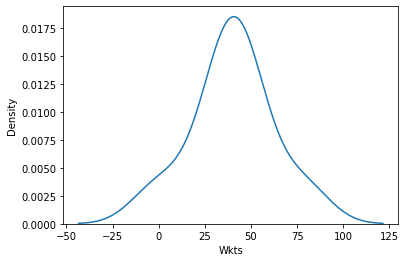